Python codes for chapter 10 (symmetric matrices).

Chapter 10: Symmetric Matrices

Example 1: Positive Definite Matrix
Matrix A_pos:
[[2 1]
 [1 3]]
Is A_pos symmetric? True

Orthogonal matrix P:
[[ 0.52573111 -0.85065081]
 [ 0.85065081  0.52573111]]

Diagonal matrix D (eigenvalues):
[[3.61803399 0.        ]
 [0.         1.38196601]]

Reconstructed A_pos = P D P^T:
[[2. 1.]
 [1. 3.]]
Are they equal? True

Classification: Positive Definite


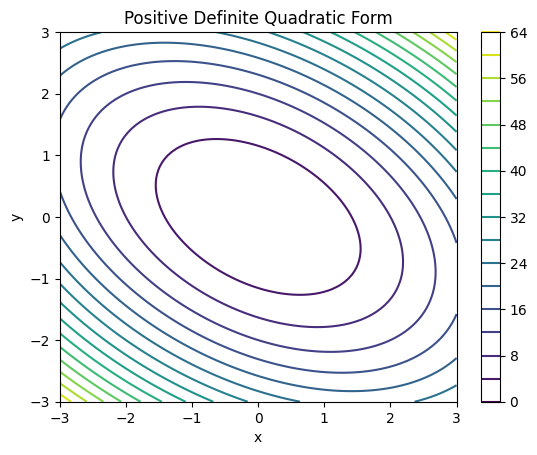



Example 2: Indefinite Matrix
Matrix A_ind:
[[ 1  2]
 [ 2 -1]]
Is A_ind symmetric? True

Orthogonal matrix P:
[[-0.85065081  0.52573111]
 [-0.52573111 -0.85065081]]

Diagonal matrix D (eigenvalues):
[[ 2.23606798  0.        ]
 [ 0.         -2.23606798]]

Reconstructed A_ind = P D P^T:
[[ 1.  2.]
 [ 2. -1.]]
Are they equal? True

Classification: Indefinite


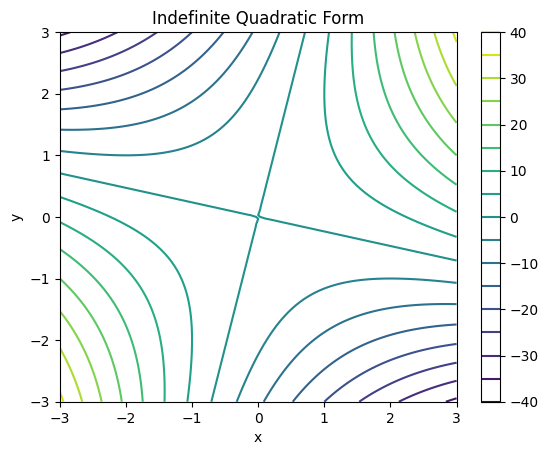



Example 3: Random Symmetric Matrix
Random symmetric matrix A_sym (4x4):
[[0.37454012 0.55336647 0.66655448 0.71555056]
 [0.55336647 0.15599452 0.38307809 0.53925763]
 [0.66655448 0.38307809 0.02058449 0.57586741]
 [0.71555056 0.53925763 0.57586741 0.18340451]]
Is A_sym symmetric? True

Eigenvalues (sorted): [ 1.93441705 -0.23996615 -0.45014823 -0.50977902]

Classification: Indefinite


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.linalg import eig
import warnings

# Suppress warnings for small eigenvalues
# Use DeprecationWarning for compatibility with older Python versions
warnings.filterwarnings('ignore', category=DeprecationWarning)

def is_symmetric(A, tol=1e-10):
    """Check if matrix A is symmetric."""
    return np.allclose(A, A.T, atol=tol)

def orthogonal_diagonalize(A):
    """
    Diagonalize a symmetric matrix A using orthogonal matrix P.
    Returns: P (orthogonal), D (diagonal), reconstructed_A (PDP^T)
    Uses np.linalg.eigh for better numerical stability with symmetric matrices.
    """
    if not is_symmetric(A):
        raise ValueError("Matrix must be symmetric.")

    # Compute eigenvalues and eigenvectors using eigh for symmetric matrices
    eigenvals, eigenvecs = np.linalg.eigh(A)  # This returns real eigenvalues and orthonormal eigenvectors

    # Sort eigenvalues in descending order (optional, but common)
    idx = np.argsort(eigenvals)[::-1]
    eigenvals_sorted = eigenvals[idx]
    eigenvecs_sorted = eigenvecs[:, idx]

    # Ensure eigenvectors are orthonormal (they should be from eigh)
    P = eigenvecs_sorted
    D = np.diag(eigenvals_sorted)

    # Reconstruct A to verify
    reconstructed_A = P @ D @ P.T

    return P, D, reconstructed_A

def classify_definiteness(A):
    """
    Classify a symmetric matrix A as positive/negative/semi-definite or indefinite.
    Uses eigenvalues.
    """
    if not is_symmetric(A):
        raise ValueError("Matrix must be symmetric.")

    eigenvals = np.linalg.eigvalsh(A).real  # Get real parts of eigenvalues
    tol = 1e-10

    # Count positive, negative, zero eigenvalues
    pos = np.sum(eigenvals > tol)
    neg = np.sum(eigenvals < -tol)
    zero = np.sum(np.abs(eigenvals) <= tol)

    if pos == len(eigenvals):
        return "Positive Definite"
    elif neg == len(eigenvals):
        return "Negative Definite"
    elif pos > 0 and neg > 0:
        return "Indefinite"
    elif pos > 0 and zero > 0:
        return "Positive Semi-Definite"
    elif neg > 0 and zero > 0:
        return "Negative Semi-Definite"
    else:
        return "Zero Matrix"

def visualize_quadratic_form(A, title="Quadratic Form"):
    """
    Visualize the quadratic form Q(x) = x^T A x in 2D.
    Assumes A is 2x2.
    """
    if A.shape != (2, 2):
        raise ValueError("A must be 2x2 for visualization.")

    x = np.linspace(-3, 3, 100)
    y = np.linspace(-3, 3, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)

    for i in range(len(x)):
        for j in range(len(y)):
            vec = np.array([X[i,j], Y[i,j]])
            Z[i,j] = vec.T @ A @ vec

    # Ensure Z is real (though it should be for real A)
    Z = np.real(Z)

    fig, ax = plt.subplots()
    contour = ax.contour(X, Y, Z, levels=15, cmap='viridis')
    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    fig.colorbar(contour, ax=ax)
    plt.show()

def demo_symmetric_matrices():
    """Demo functions for Chapter 10: Symmetric Matrices"""

    print("="*60)
    print("Chapter 10: Symmetric Matrices")
    print("="*60)

    # Example 1: Positive Definite Matrix
    print("\nExample 1: Positive Definite Matrix")
    A_pos = np.array([[2, 1], [1, 3]])
    print(f"Matrix A_pos:\n{A_pos}")

    # Check symmetry
    print(f"Is A_pos symmetric? {is_symmetric(A_pos)}")

    # Orthogonal diagonalization
    P, D, recon = orthogonal_diagonalize(A_pos)
    print(f"\nOrthogonal matrix P:\n{P}")
    print(f"\nDiagonal matrix D (eigenvalues):\n{D}")
    print(f"\nReconstructed A_pos = P D P^T:\n{recon}")
    print(f"Are they equal? {np.allclose(recon, A_pos)}")

    # Classification
    def_type = classify_definiteness(A_pos)
    print(f"\nClassification: {def_type}")

    # Visualization
    visualize_quadratic_form(A_pos, "Positive Definite Quadratic Form")

    # Example 2: Indefinite Matrix
    print("\n\nExample 2: Indefinite Matrix")
    A_ind = np.array([[1, 2], [2, -1]])
    print(f"Matrix A_ind:\n{A_ind}")

    # Check symmetry
    print(f"Is A_ind symmetric? {is_symmetric(A_ind)}")

    # Orthogonal diagonalization
    P, D, recon = orthogonal_diagonalize(A_ind)
    print(f"\nOrthogonal matrix P:\n{P}")
    print(f"\nDiagonal matrix D (eigenvalues):\n{D}")
    print(f"\nReconstructed A_ind = P D P^T:\n{recon}")
    print(f"Are they equal? {np.allclose(recon, A_ind)}")

    # Classification
    def_type = classify_definiteness(A_ind)
    print(f"\nClassification: {def_type}")

    # Visualization
    visualize_quadratic_form(A_ind, "Indefinite Quadratic Form")

    # Example 3: Random Symmetric Matrix
    print("\n\nExample 3: Random Symmetric Matrix")
    np.random.seed(42)
    n = 4
    A_rand = np.random.rand(n, n)
    A_sym = (A_rand + A_rand.T) / 2  # Make it symmetric
    print(f"Random symmetric matrix A_sym (4x4):")
    print(A_sym)

    # Check symmetry
    print(f"Is A_sym symmetric? {is_symmetric(A_sym)}")

    # Orthogonal diagonalization
    P, D, recon = orthogonal_diagonalize(A_sym)
    print(f"\nEigenvalues (sorted): {np.diag(D)}")

    # Classification
    def_type = classify_definiteness(A_sym)
    print(f"\nClassification: {def_type}")

if __name__ == "__main__":
    demo_symmetric_matrices()